In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Charger une image depuis votre espace de travail
image_path = '/content/drive/MyDrive/traitement_image/images (1).jpeg'
image = cv2.imread(image_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Diviser l'image en canaux R, G et B
b, g, r = cv2.split(image)

In [ ]:
# Appliquer l'égalisation d'histogramme à chaque canal
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

In [ ]:
# Fusionner les canaux égalisés pour obtenir l'image égalisée en couleur
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

In [ ]:
# Implémenter la transformation linéaire manuellement
def linear_transform(image, alpha, beta):
    transformed_image = alpha * image + beta
    return np.clip(transformed_image, 0, 255).astype(np.uint8)

In [ ]:
# Implémenter la correction de gamma manuellement
def gamma_correction(image, gamma):
    corrected_image = np.power(image / 255.0, gamma) * 255.0
    return corrected_image.astype(np.uint8)

In [ ]:
#linear_params = [(1.2, 20), (1.5, 30), (0.8, 10)]
#gamma_values = [0.7, 1.0, 1.5]

In [ ]:
# Paramètres pour la transformation linéaire
alpha = 0.8
beta = 10

In [ ]:
# Paramètres pour la correction de gamma
gamma_value = 1.5

In [ ]:
# Appliquer les transformations manuelles
linear_transformed_image = linear_transform(image, alpha, beta)
gamma_corrected_image = gamma_correction(image, gamma_value)

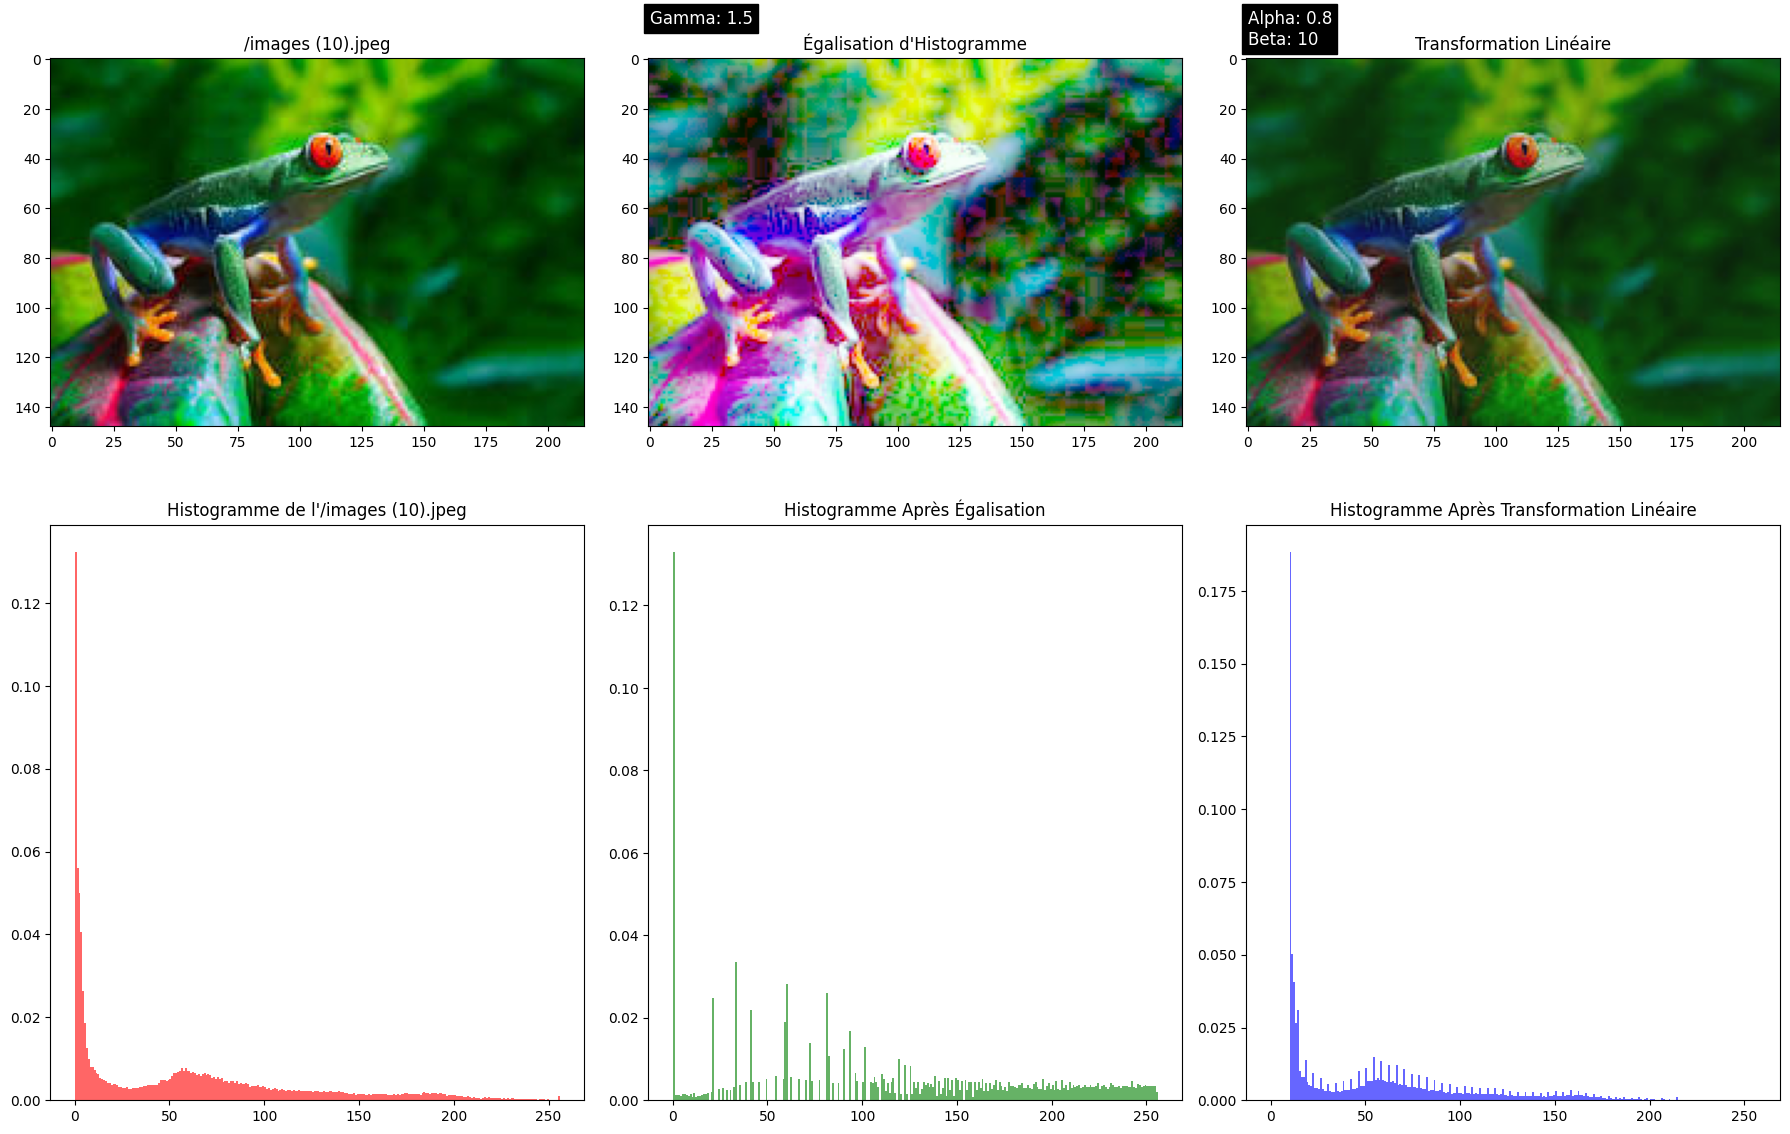

In [ ]:

# Afficher les images originales et transformées
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('/images (10).jpeg')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Égalisation d\'Histogramme')
plt.text(0, -20, f'Gamma: {gamma_value}', color='white', fontsize=12, ha='left', va='top', backgroundcolor='black')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(linear_transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformation Linéaire')
plt.text(0, -20, f'Alpha: {alpha}\nBeta: {beta}', color='white', fontsize=12, ha='left', va='top', backgroundcolor='black')


plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
plt.title('Histogramme de l\'/images (10).jpeg')

plt.subplot(2, 3, 5)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), density=True, color='g', alpha=0.6)
plt.title('Histogramme Après Égalisation')

plt.subplot(2, 3, 6)
plt.hist(linear_transformed_image.ravel(), bins=256, range=(0, 256), density=True, color='b', alpha=0.6)
plt.title('Histogramme Après Transformation Linéaire')

plt.tight_layout()
plt.show()

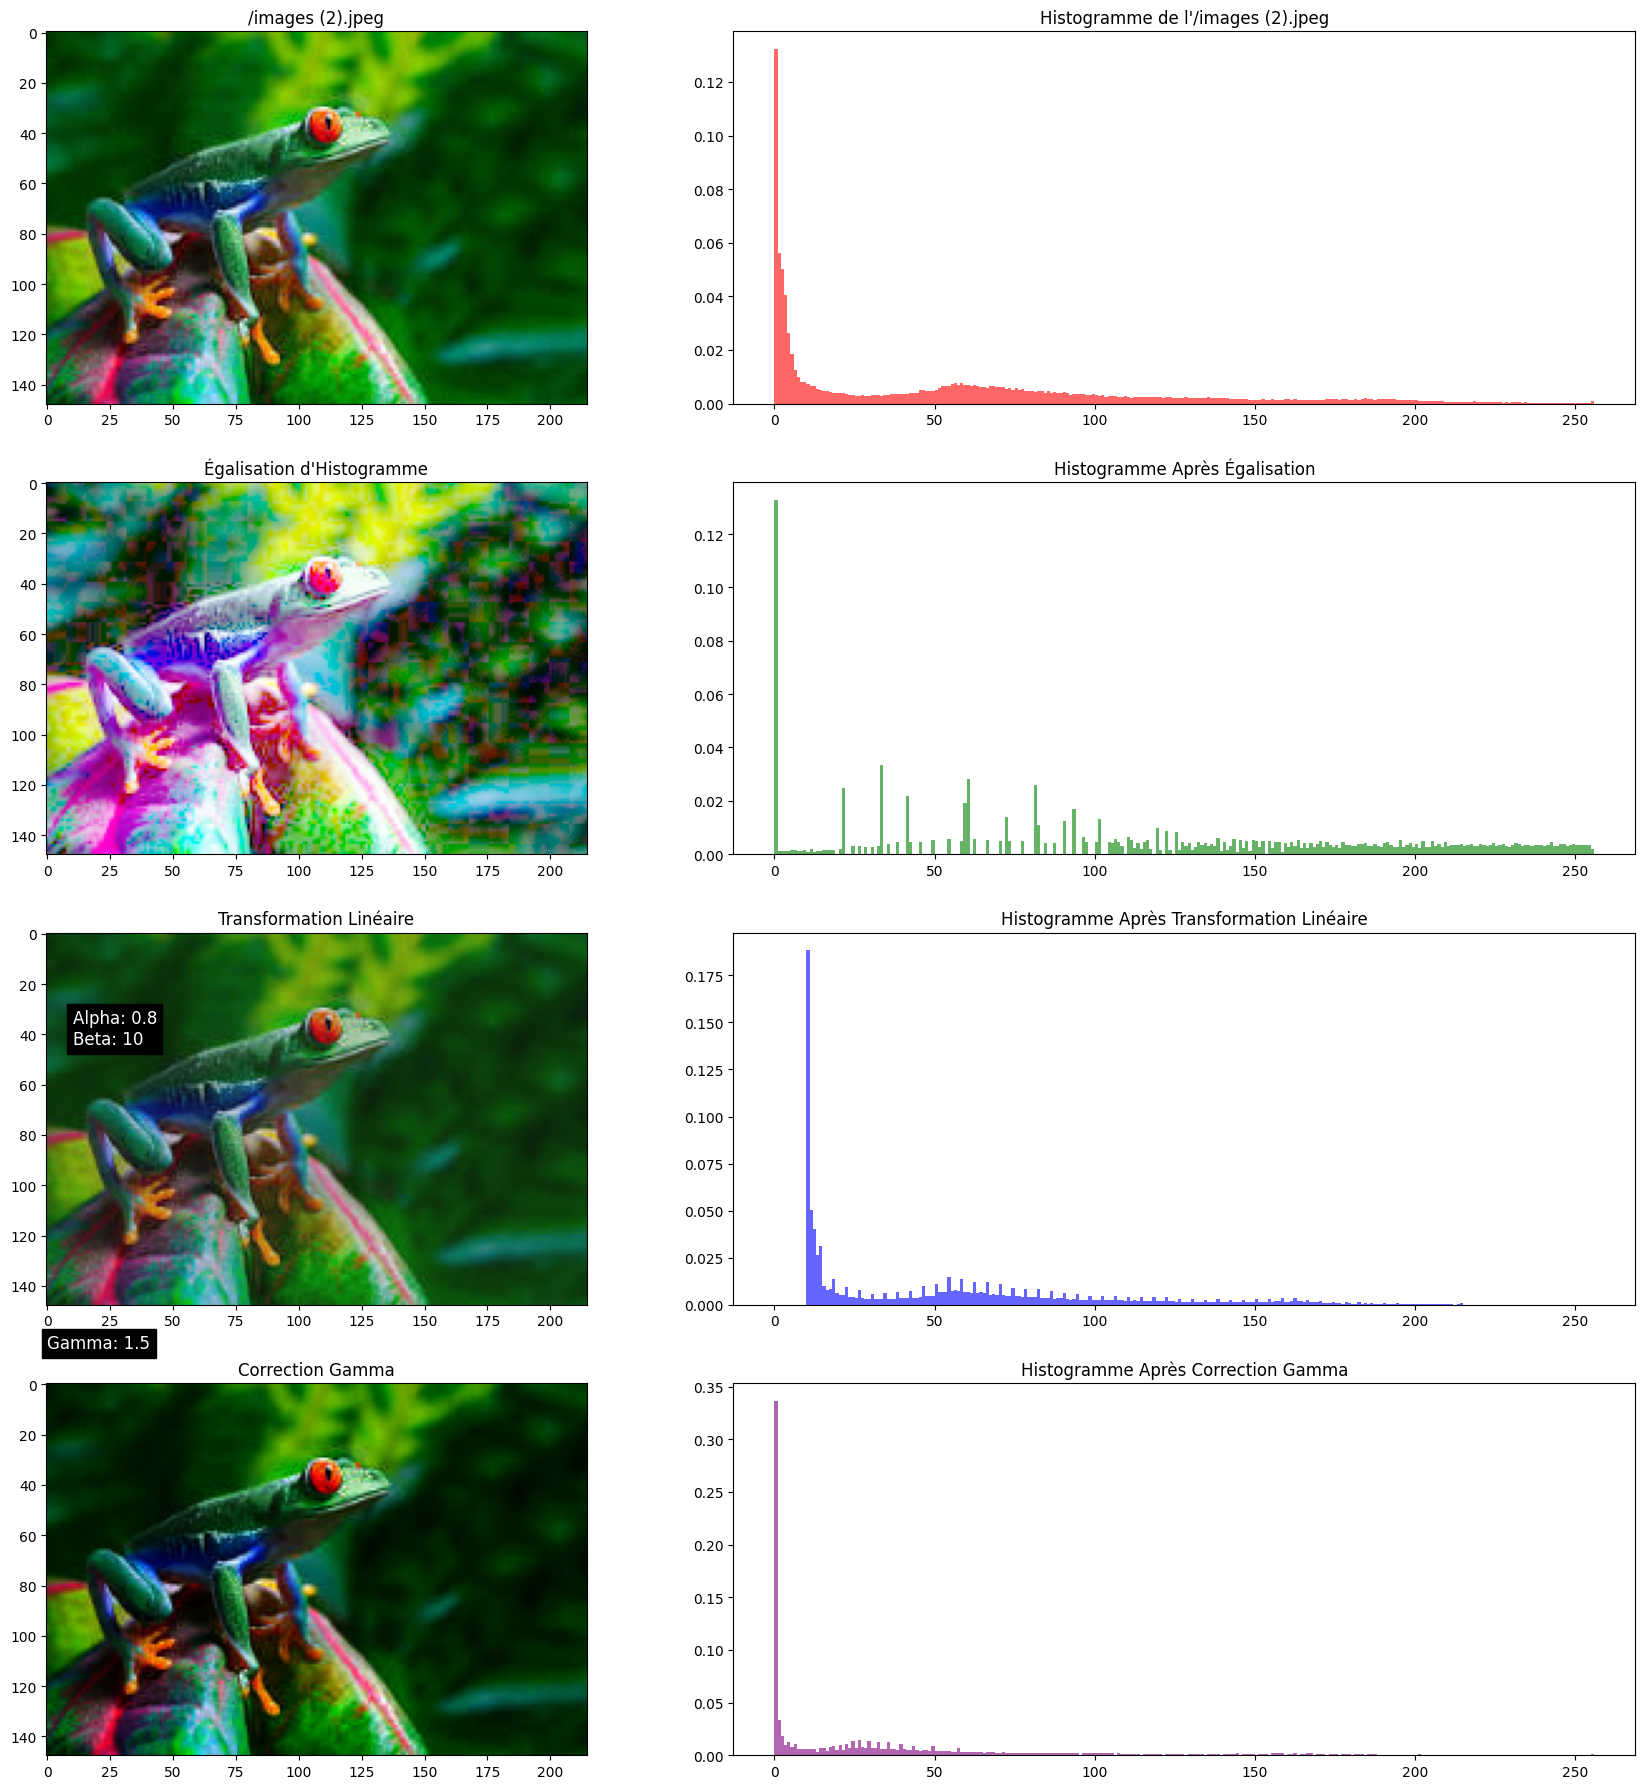

In [ ]:
# ...

# Afficher les images originales et transformées
plt.figure(figsize=(18, 18))

# Image Originale
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('/images (2).jpeg')

plt.subplot(4, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
plt.title('Histogramme de l\'/images (2).jpeg')

# Égalisation d'Histogramme
plt.subplot(4, 2, 3)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Égalisation d\'Histogramme')

plt.subplot(4, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), density=True, color='g', alpha=0.6)
plt.title('Histogramme Après Égalisation')

# Transformation Linéaire
plt.subplot(4, 2, 5)
plt.imshow(cv2.cvtColor(linear_transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformation Linéaire')
plt.text(10, 30, f'Alpha: {alpha}\nBeta: {beta}', color='white', fontsize=12, ha='left', va='top', backgroundcolor='black')

plt.subplot(4, 2, 6)
plt.hist(linear_transformed_image.ravel(), bins=256, range=(0, 256), density=True, color='b', alpha=0.6)
plt.title('Histogramme Après Transformation Linéaire')

# Correction Gamma
plt.subplot(4, 2, 7)
plt.imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Correction Gamma')
plt.text(0, -20, f'Gamma: {gamma_value}', color='white', fontsize=12, ha='left', va='top', backgroundcolor='black')

plt.subplot(4, 2, 8)
plt.hist(gamma_corrected_image.ravel(), bins=256, range=(0, 256), density=True, color='purple', alpha=0.6)
plt.title('Histogramme Après Correction Gamma')

plt.tight_layout()
plt.show()


In [ ]:
['/images (5).jpeg', '/images (7).jpeg', '/images (8).jpeg']

['/images (5).jpeg', '/images (7).jpeg', '/images (8).jpeg']

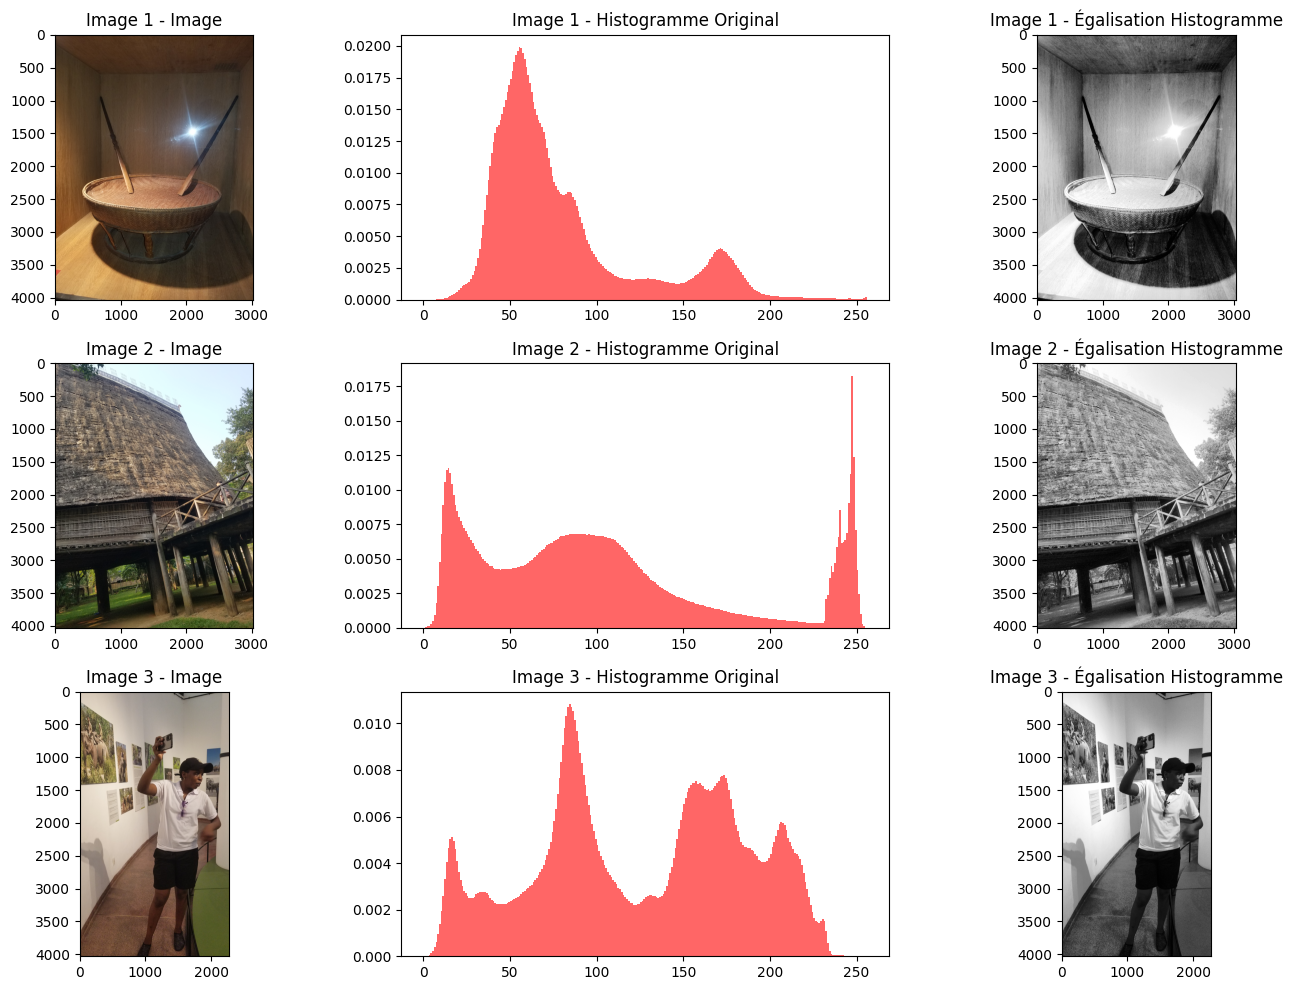

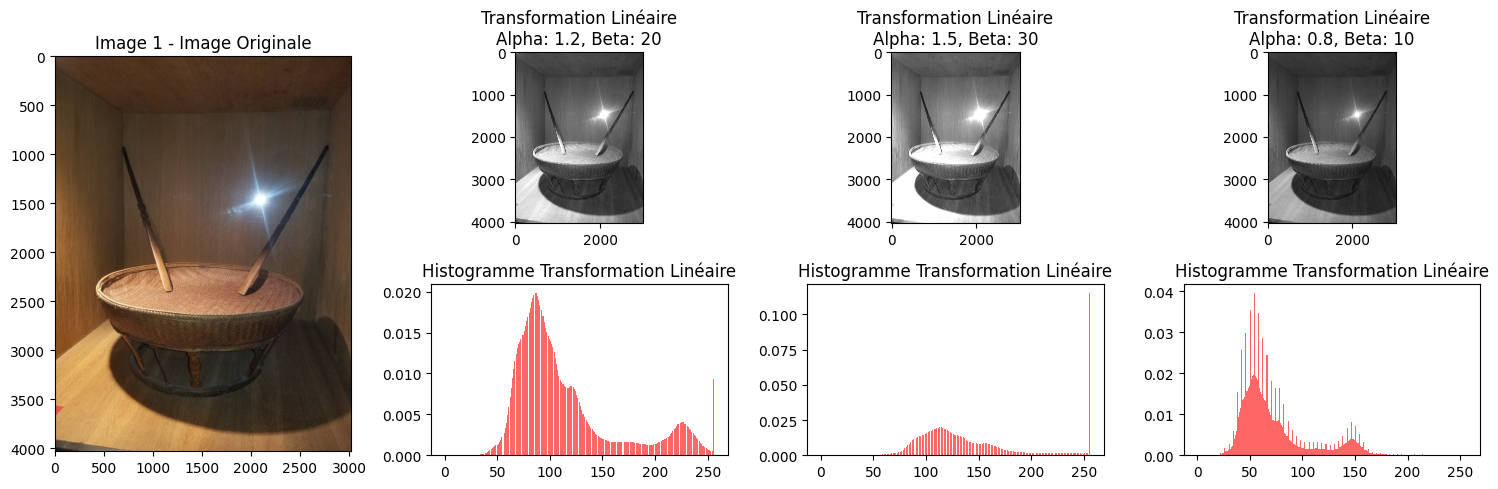

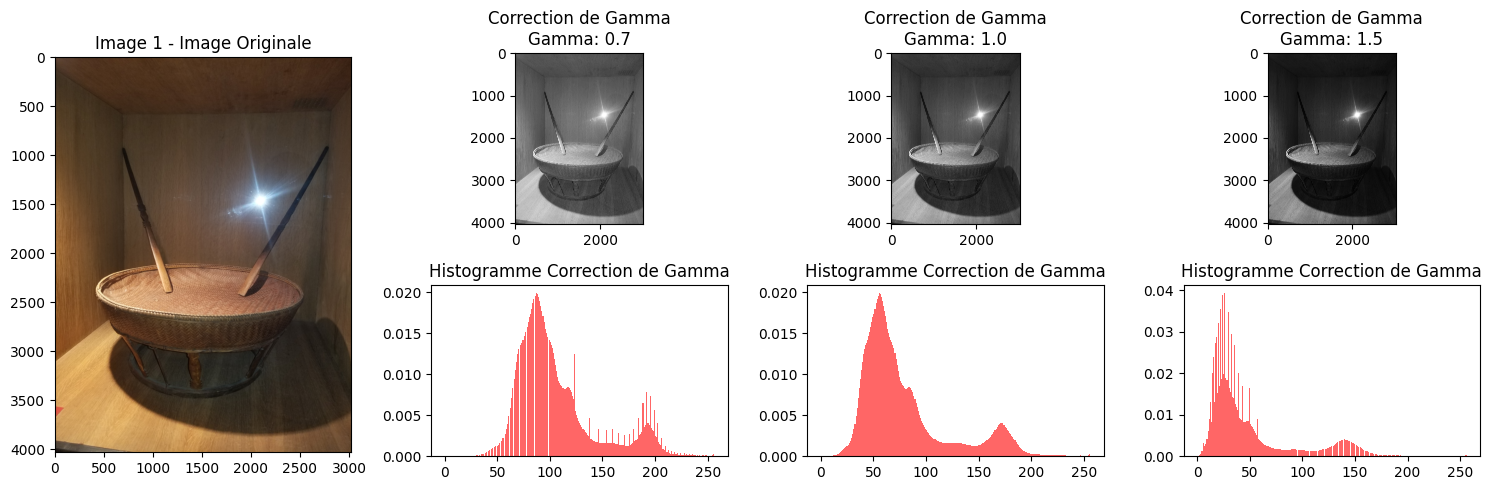

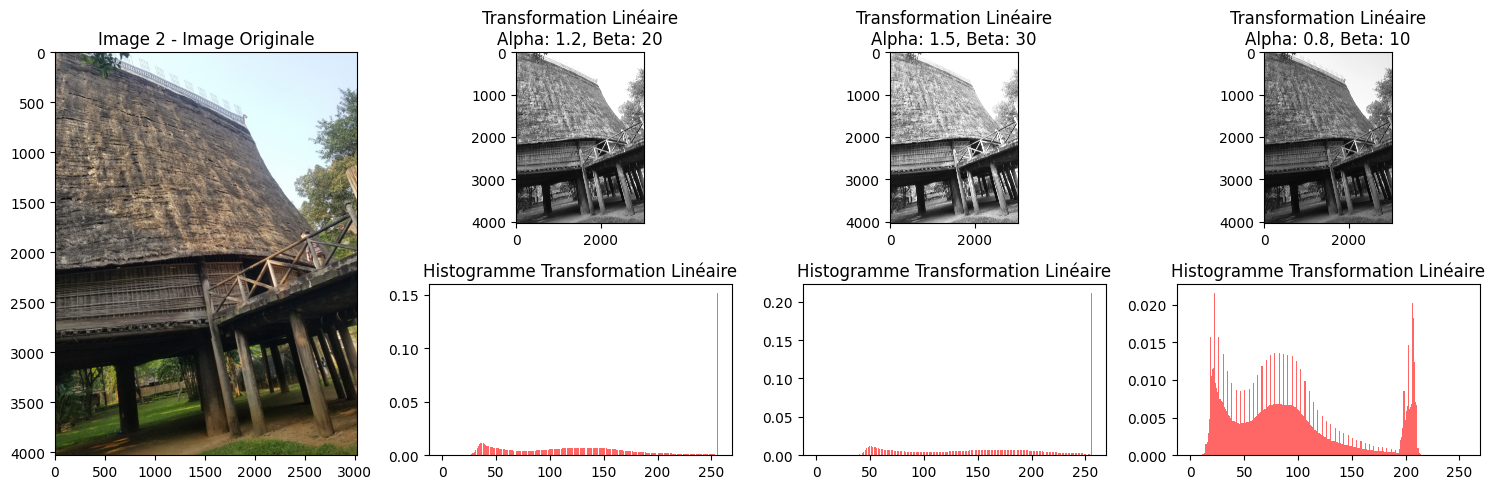

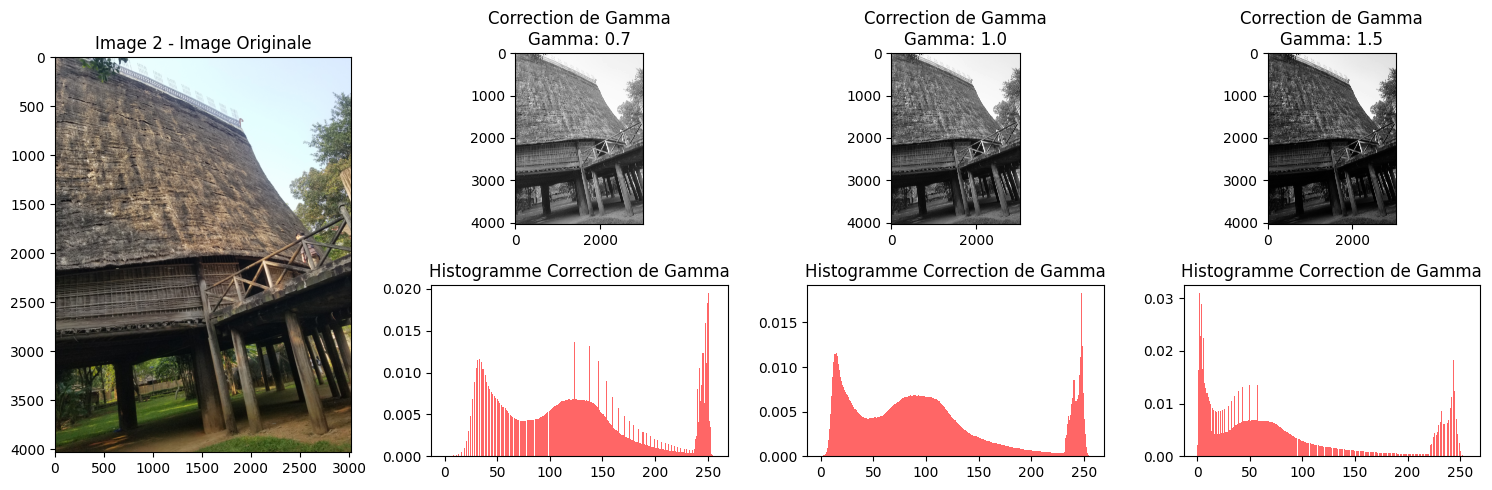

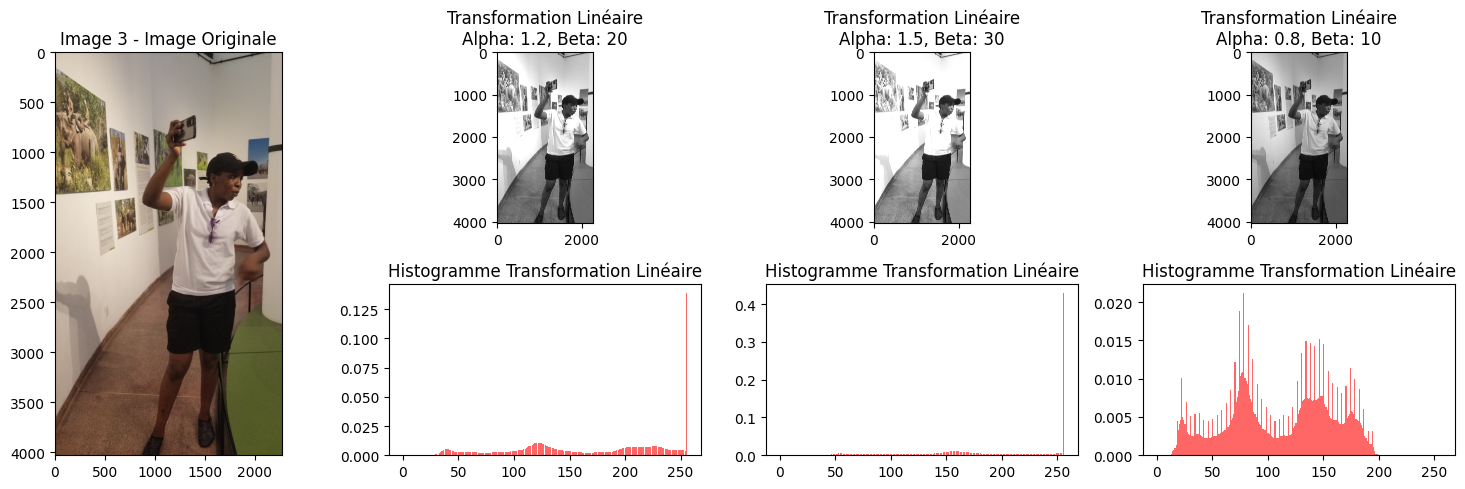

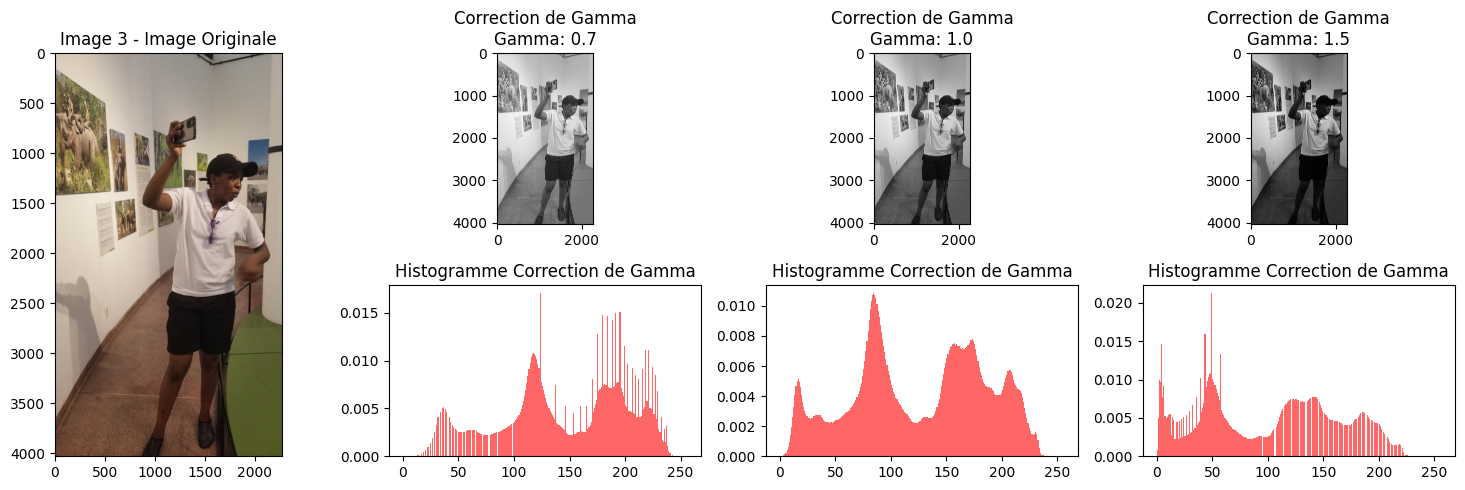

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_equalization(image):
    equalized_image = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
    return equalized_image

def apply_linear_transform(image, alpha, beta):
    transformed_image = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return transformed_image

def apply_gamma_correction(image, gamma):
    corrected_image = np.power(image / 255.0, gamma) * 255.0
    return corrected_image.astype(np.uint8)

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    rows = len(images)

    for i in range(rows):
        plt.subplot(rows, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i] + ' - Image')

        plt.subplot(rows, 3, i*3 + 2)
        plt.hist(cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
        plt.title(titles[i] + ' - Histogramme Original')

        equalized_image = apply_equalization(images[i])
        plt.subplot(rows, 3, i*3 + 3)
        plt.imshow(equalized_image, cmap='gray')
        #plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
        plt.title(titles[i] + ' - Égalisation Histogramme')

    plt.tight_layout()
    plt.show()

# Charger les images depuis votre espace de travail
image_paths = ['/content/drive/MyDrive/traitement_image/20240416_142517.jpg',
               '/content/drive/MyDrive/traitement_image/20240416_154740.jpg',
               '/content/drive/MyDrive/traitement_image/20240416_143803.jpg']
images = [cv2.imread(path) for path in image_paths]

titles = ['Image 1', 'Image 2', 'Image 3']

# Afficher les images originales, leurs histogrammes et images après égalisation d'histogramme
display_images(images, titles)

# Paramètres à tester
linear_params = [(1.2, 20), (1.5, 30), (0.8, 10)]
gamma_values = [0.7, 1.0, 1.5]

for image, title in zip(images, titles):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title + ' - Image Originale')

    for i, (alpha, beta) in enumerate(linear_params):
        linear_transformed_image = apply_linear_transform(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), alpha, beta)
        plt.subplot(2, 4, 2 + i)
        plt.imshow(linear_transformed_image, cmap='gray')
        plt.title('Transformation Linéaire\nAlpha: {}, Beta: {}'.format(alpha, beta))

        plt.subplot(2, 4, 6 + i)
        plt.hist(linear_transformed_image.ravel(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
        plt.title('Histogramme Transformation Linéaire')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title + ' - Image Originale')

    for i, gamma in enumerate(gamma_values):
        gamma_corrected_image = apply_gamma_correction(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), gamma)
        plt.subplot(2, 4, 2 + i)
        plt.imshow(gamma_corrected_image, cmap='gray')
        plt.title('Correction de Gamma\nGamma: {}'.format(gamma))

        plt.subplot(2, 4, 6 + i)
        plt.hist(gamma_corrected_image.ravel(), bins=256, range=(0, 256), density=True, color='r', alpha=0.6)
        plt.title('Histogramme Correction de Gamma')

    plt.tight_layout()
    plt.show()
